<a href="https://colab.research.google.com/github/sushirito/Molecular-Dynamics/blob/main/OpenMM_Scripting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**NOTE**: Code must be run twice to work

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

!mamba install -c conda-forge ambertools -y

✨🍰✨ Everything looks OK!

Looking for: ['ambertools']

conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache

Pinned packages:
  - python 3.11.*
  - python 3.11.*
  - python_abi 3.11.* *cp311*
  - cuda-version 12.*


Transaction

  Prefix: /usr/local

  All requested packages already installed



In [2]:
!git clone https://github.com/Iourarum/GOPY.git
%cd GOPY
!python GOPY.py generate_PG 10 10 graphene.pdb
!python GOPY.py generate_GO graphene.pdb 2 4 8 functionalized.pdb

Cloning into 'GOPY'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 197 (delta 39), reused 18 (delta 18), pack-reused 150 (from 1)
Receiving objects: 100% (197/197), 9.50 MiB | 25.01 MiB/s, done.
Resolving deltas: 100% (99/99), done.
/content/GOPY
done.
GOPY.py
generate_GO
graphene.pdb
2
4
8
functionalized.pdb
Left to add:  cooh:  2 epoxy:  4 hydroxyl:  8
Left to add:  cooh:  2 epoxy:  4 hydroxyl:  7
Left to add:  cooh:  2 epoxy:  4 hydroxyl:  6
Left to add:  cooh:  2 epoxy:  4 hydroxyl:  5
Left to add:  cooh:  2 epoxy:  3 hydroxyl:  5
Left to add:  cooh:  1 epoxy:  3 hydroxyl:  5
Left to add:  cooh:  0 epoxy:  3 hydroxyl:  5
Left to add:  cooh:  0 epoxy:  2 hydroxyl:  5
Left to add:  cooh:  0 epoxy:  2 hydroxyl:  4
Left to add:  cooh:  0 epoxy:  1 hydroxyl:  4
Left to add:  cooh:  0 epoxy:  1 hydroxyl:  3
Left to add:  cooh:  0 epoxy:  0 hydroxyl:  3
Left to add:  cooh:  0 epoxy:  0

In [3]:
!wget https://raw.githubusercontent.com/Iourarum/GOPY/master/GO_tutorial/GGG.lib
!wget https://raw.githubusercontent.com/Iourarum/GOPY/master/GO_tutorial/C1A.lib
!wget https://raw.githubusercontent.com/Iourarum/GOPY/master/GO_tutorial/E1A.lib
!wget https://raw.githubusercontent.com/Iourarum/GOPY/master/GO_tutorial/H1A.lib
!mkdir -p FRCMOD
!wget -P FRCMOD https://raw.githubusercontent.com/Iourarum/GOPY/master/GO_tutorial/FRCMOD/GO.frcmod

--2025-02-11 02:20:56--  https://raw.githubusercontent.com/Iourarum/GOPY/master/GO_tutorial/GGG.lib
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1063 (1.0K) [text/plain]
Saving to: ‘GGG.lib’

GGG.lib             100%[===================>]   1.04K  --.-KB/s    in 0s      

2025-02-11 02:20:56 (56.5 MB/s) - ‘GGG.lib’ saved [1063/1063]

--2025-02-11 02:20:57--  https://raw.githubusercontent.com/Iourarum/GOPY/master/GO_tutorial/C1A.lib
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1627 (1.6K) [text/plain]
Saving to: ‘C1A.lib’

C1

In [4]:
!pip install openmm
!pip install MDAnalysis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 76.5 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import PandasTools
import openbabel

# from openff.toolkit.typing.engines.smirnoff import ForceField
# import parmed



Force_field = "ff19SB"
ff = "leaprc.protein.ff19SB"
# if Force_field == "ff19SB":
#   ff = "leaprc.protein.ff19SB"
# else:
#   ff = "leaprc.protein.ff14SB"

Water_type = "TIP3P"
if Water_type == "TIP3P":
  water = "leaprc.water.tip3p"
  water_box = "TIP3PBOX"
else:
  water = "leaprc.water.opc"
  water_box = "OPCBOX"
# elif Water_type == "OPC":
  # water = "leaprc.water.tip3p"
  # water_box ="set SYS box {50,50,50}"


Size_box = 12
size_box = Size_box


Ions = "NaCl"

Concentration = "0.15"


Ligand_Force_field = "GAFF2"

# Ligand_net_charges = "0" #@param {type:"string", min:-10, max:10, step:1}

tleap = os.path.join(workDir, "tleap.in")
top_nw = os.path.join(workDir, "SYS_nw.prmtop")
crd_nw = os.path.join(workDir, "SYS_nw.crd")
pdb_nw = os.path.join(workDir, "SYS_nw.pdb")
top = os.path.join(workDir, "SYS_gaff2.prmtop")
crd = os.path.join(workDir, "SYS_gaff2.crd")
pdb = os.path.join(workDir, "SYS.pdb")
ligand_pdb = os.path.join(workDir, "smiles_min.pdb")
ligand_noh = os.path.join(workDir, "ligand_noh.pdb")
ligand_h = os.path.join(workDir, "ligand_h.pdb")
ligand_mol2 = os.path.join(workDir, "ligand.mol2")
ligand_frcmod = os.path.join(workDir, "ligand.frcmod")
lig_new = os.path.join(workDir, "ligand_gaff.pdb")
protein_ligand = os.path.join(workDir, "protein_ligand.pdb")
lib = os.path.join(workDir, "lig.lib")

gaff_command1 = "pdb4amber -i " + str(ligand_pdb) + " -o " + str(ligand_h)
gaff_command3 = "antechamber -i " + str(ligand_h) + " -fi pdb -o " + str(ligand_mol2) + " -fo mol2 -c bcc -nc " + str(charge) + " -rn LIG -at gaff2"
gaff_command4 = "parmchk2 -i " + str(ligand_mol2) + " -f mol2 -o " + str(ligand_frcmod) + " -s gaff2"

original_stdout = sys.stdout # Save a reference to the original standard output

with open('gaff.sh', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(gaff_command1)
    print(gaff_command3)
    print(gaff_command4)
    sys.stdout = original_stdout # Reset the standard output to its original value

!chmod 700 gaff.sh 2>&1 1>/dev/null
!bash gaff.sh >/dev/null 2>&1

f = open(tleap, "w")
f.write("""source """ + str(ff) + "\n"
"""source leaprc.gaff2
LIG = loadmol2 """ + str(ligand_mol2) + "\n"
"""loadamberparams """ + str(ligand_frcmod) + "\n"
"""saveoff LIG """ + str(lib) + "\n"
"""savepdb LIG """ + str(lig_new) + "\n"
"""quit""")
f.close()

tleap_command = "tleap -f " + str(tleap)
# cat_command = "cat " + str(starting_end) + " " + str(lig_new) + str(" > ") + str(protein_ligand)

original_stdout = sys.stdout # Save a reference to the original standard output

with open('run_tleap.sh', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(tleap_command)
    # print(cat_command)
    sys.stdout = original_stdout # Reset the standard output to its original value

!chmod 700 run_tleap.sh 2>&1 1>/dev/null
!bash run_tleap.sh 2>&1 1>/dev/null

# ppdb = PandasPdb().read_pdb(protein_ligand)
# ppdb.df['ATOM'] = ppdb.df['ATOM']
# ppdb.df['OTHERS'] = [ppdb.df['OTHERS'] != 'OTHERS']
# ppdb.to_pdb(path=protein_ligand, records=['ATOM', 'HETATM'], gz=False, append_newline=True)

f = open(tleap, "w")
f.write("""source """ + str(ff) + "\n"
"""source leaprc.DNA.OL15
source leaprc.RNA.OL3
source leaprc.GLYCAM_06j-1
source leaprc.gaff2
source """  + str(water) + "\n"
"""loadamberparams """ + str(ligand_frcmod) + "\n"
"""loadoff """ + str(lib) + "\n"
"""SYS = loadmol2 """ + str(ligand_mol2) + "\n"
"""alignaxes SYS
savepdb SYS """ + str(pdb_nw) + "\n"
"""saveamberparm SYS """ + str(top_nw) + " " + str(crd_nw) + "\n"
"""solvatebox SYS """ + str(water_box) + " " + str(size_box) +  """ 0.7
saveamberparm SYS """ + str(top) + " " + str(crd) + "\n"
"""savepdb SYS """ + str(pdb) + "\n"
"""quit""")
f.close()

tleap_command = "tleap -f " + str(tleap)

original_stdout = sys.stdout # Save a reference to the original standard output

with open('run_tleap.sh', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(tleap_command)
    sys.stdout = original_stdout # Reset the standard output to its original value

SYS = os.path.join(workDir, "SYS*")
rm_sys = "rm " + SYS

original_stdout = sys.stdout # Save a reference to the original standard output

with open('rm_sys.sh', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(rm_sys)
    sys.stdout = original_stdout # Reset the standard output to its original value

!chmod 700 rm_sys.sh 2>&1 1>/dev/null
!bash rm_sys.sh 2> /dev/null

!chmod 700 run_tleap.sh 2>&1 1>/dev/null
!bash run_tleap.sh 2>&1 1>/dev/null


!grep "Volume:" leap.log > temp.txt
with open("temp.txt", 'r') as f:
  for line in f:
        vol = float(line.split()[1])

vol_lit  = vol * pow(10, -27)
atom_lit = 9.03 * pow(10, 22)
conc = float(Concentration)
num_ion = int(vol_lit * (conc/0.15) * atom_lit)

if Ions == "NaCl":
  pos_neut = "Na+ 0"
  pos_num = "Na+ " + str(num_ion)
  Cl_num = num_ion
else:
  pos_neut = "K+ 0"
  pos_num = "K+ " + str(num_ion)
  Cl_num = num_ion

f = open(tleap, "w")
f.write("""source """ + str(ff) + "\n"
"""source leaprc.DNA.OL15
source leaprc.RNA.OL3
source leaprc.GLYCAM_06j-1
source leaprc.gaff2
source """  + str(water) + "\n"
"""loadamberparams """ + str(ligand_frcmod) + "\n"
"""loadoff """ + str(lib) + "\n"
"""SYS = loadmol2 """ + str(ligand_mol2) + "\n"
"""alignaxes SYS
check SYS
charge SYS
addions SYS """ + str(pos_neut) + "\n"
"""addions SYS Cl- 0
check SYS
charge SYS
savepdb SYS """ + str(pdb_nw) + "\n"
"""saveamberparm SYS """ + str(top_nw) + " " + str(crd_nw) + "\n"
"""solvatebox SYS """ + str(water_box) + " " + str(size_box) +  """ 0.7 """ + "\n"
"""addIonsRand SYS """ + str(pos_num) + """ Cl- """ + str(Cl_num) + "\n"
"""saveamberparm SYS """ + str(top) + " " + str(crd) + "\n"
"""savepdb SYS """ + str(pdb) + "\n"
"""quit""")
f.close()

!chmod 700 run_tleap.sh 2>&1 1>/dev/null
!bash run_tleap.sh 2>&1 1>/dev/null

pdb_amber = os.path.exists(pdb)
top_amber = os.path.exists(top)
crd_amber = os.path.exists(crd)

if pdb_amber == True and top_amber == True and crd_amber == True:
  print("Successfully generated topology! :-)")
else:
  print("ERROR: Check your inputs! ")
!!rm *.sh  ANTECHAMBER* ATOMTYPE* temp.txt >/dev/null 2>&1

In [11]:
import os, sys, math

# --- User settings ---
Force_field = "ff19SB"
ff = "leaprc.protein.ff19SB"
Water_type = "TIP3P"
if Water_type == "TIP3P":
    water = "leaprc.water.tip3p"
    water_box = "TIP3PBOX"
else:
    water = "leaprc.water.opc"
    water_box = "OPCBOX"
Size_box = 12
size_box = Size_box
Concentration = "0.15"  # in M

# --- File paths (working in current directory) ---
workDir = os.getcwd()
# For activated carbon, use the provided PDB
pdb_input = os.path.join(workDir, "functionalized.pdb")
# Intermediate (non-ion) system
top_nw = os.path.join(workDir, "SYS_nw.prmtop")
crd_nw = os.path.join(workDir, "SYS_nw.crd")
pdb_nw = os.path.join(workDir, "SYS_nw.pdb")
# Final system (with ions)
top = os.path.join(workDir, "SYS.prmtop")
crd = os.path.join(workDir, "SYS.crd")
pdb_out = os.path.join(workDir, "SYS.pdb")

# --- Stage 1: Build solvated system without ions ---
tleap_stage1 = os.path.join(workDir, "tleap_stage1.in")
with open(tleap_stage1, "w") as f:
    f.write(f"""source {ff}
source {water}
loadAmberParams frcmod.ions234lm_126_tip3p
loadamberparams FRCMOD/GO.frcmod
SYS = loadpdb functionalized.pdb
bondbydistance SYS
solvateBox SYS {water_box} {size_box} 0.7
saveamberparm SYS {top_nw} {crd_nw}
savepdb SYS {pdb_nw}
quit
""")
os.system("tleap -f " + tleap_stage1)

# --- Determine system volume from leap.log to compute ion numbers ---
os.system("grep 'Volume:' leap.log > temp.txt")
with open("temp.txt", 'r') as f:
    for line in f:
        vol = float(line.split()[1])
# Convert volume (A³) to liters: 1 A³ = 1e-27 L
vol_lit = vol * 1e-27
# Approximate number density (for 0.15 M NaCl originally)
atom_lit = 9.03e22
conc = float(Concentration)
num_ion = int(vol_lit * (conc/0.15) * atom_lit)
# For Hg²⁺ simulation, add Hg ions and twice as many Cl⁻ for neutrality
# (Note: tleap uses residue names; here we use "HG" for Hg²⁺)
pos_neut = "HG 0"
pos_num = f"HG {num_ion}"
Cl_num = 2 * num_ion

# --- Stage 2: Build final system with ions (random placement) ---
tleap_stage2 = os.path.join(workDir, "tleap_stage2.in")
with open(tleap_stage2, "w") as f:
    f.write(f"""source {ff}
source {water}
loadAmberParams frcmod.ions234lm_126_tip3p
loadamberparams FRCMOD/GO.frcmod
SYS = loadpdb functionalized.pdb
bondbydistance SYS
solvateBox SYS {water_box} {size_box} 0.7
addIonsRand SYS HG {num_ion} Cl- {Cl_num}
saveamberparm SYS {top} {crd}
savepdb SYS {pdb_out}
quit
""")
os.system("tleap -f " + tleap_stage2)

# --- Clean up temporary files ---
os.system("chmod 700 tleap_stage1.in tleap_stage2.in 2>&1 1>/dev/null")
os.system("rm tleap_stage1.in tleap_stage2.in temp.txt 2>/dev/null")

# --- Check output ---
if os.path.exists(pdb_out) and os.path.exists(top) and os.path.exists(crd):
    print("Successfully generated topology! :-)")
else:
    print("ERROR: Check your inputs!")


ERROR: Check your inputs!


New

In [16]:
import os

# ---------------------------
# Stage 1: Solvate Without Ions
# ---------------------------
leap_content_stage1 = f"""\
source leaprc.protein.ff14SB
source leaprc.water.tip3p
loadAmberParams frcmod.ions234lm_126_tip3p
loadoff GGG.lib
loadoff C1A.lib
loadoff E1A.lib
loadoff H1A.lib
loadamberparams FRCMOD/GO.frcmod
mol = loadpdb functionalized.pdb
bondbydistance mol
solvateBox mol TIP3PBOX 20.0
saveamberparm mol mol_solv.prmtop mol_solv.inpcrd
quit
"""
with open('leap_stage1.in', 'w') as f:
    f.write(leap_content_stage1)

os.system('tleap -f leap_stage1.in')

# ---------------------------
# Stage 2: Compute Ion Numbers from Volume
# ---------------------------
# Extract volume from the tleap log file
os.system("grep 'Volume:' leap.log > temp_vol.txt")
with open("temp_vol.txt", 'r') as f:
    for line in f:
        vol = float(line.split()[1])
# Convert Å³ to liters (1 Å³ = 1e-27 L)
vol_lit = vol * 1e-27

# Calculate the number of Hg ions for a 0.15 M solution.
# The factor 9.03e22 approximates (6.022e23 * 0.15)
atom_factor = 6.022e23 * 0.15
num_Hg = int(vol_lit * atom_factor)
num_Cl = 2 * num_Hg  # Charge neutrality for divalent Hg²⁺

print(f"Computed ion counts -> Hg: {num_Hg}, Cl: {num_Cl}")

# ---------------------------
# Stage 3: Solvate and Randomly Add Ions
# ---------------------------
leap_content_stage2 = f"""\
source leaprc.protein.ff14SB
source leaprc.water.tip3p
loadAmberParams frcmod.ions234lm_126_tip3p
loadoff GGG.lib
loadoff C1A.lib
loadoff E1A.lib
loadoff H1A.lib
loadamberparams FRCMOD/GO.frcmod
mol = loadpdb functionalized.pdb
bondbydistance mol
solvateBox mol TIP3PBOX 5.0
addIonsRand mol HG {num_Hg} Cl- {num_Cl}
saveamberparm mol mol_solv_ions.prmtop mol_solv_ions.inpcrd
quit
"""
with open('leap_stage2.in', 'w') as f:
    f.write(leap_content_stage2)

os.system('tleap -f leap_stage2.in')

# ---------------------------
# Cleanup temporary files
# ---------------------------
#os.remove('temp_vol.txt')
#os.remove('leap_stage1.in')
#os.remove('leap_stage2.in')


Computed ion counts -> Hg: 15, Cl: 30


0

-I: Adding /usr/local/dat/leap/prep to search path.
-I: Adding /usr/local/dat/leap/lib to search path.
-I: Adding /usr/local/dat/leap/parm to search path.
-I: Adding /usr/local/dat/leap/cmd to search path.
-f: Source tleap.in.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./tleap.in
----- Source: /usr/local/dat/leap/cmd/leaprc.protein.ff14SB
----- Source of /usr/local/dat/leap/cmd/leaprc.protein.ff14SB done
Log file: ./leap.log
Loading parameters: /usr/local/dat/leap/parm/parm10.dat
Reading title:
PARM99 + frcmod.ff99SB + frcmod.parmbsc0 + OL3 for RNA
Loading parameters: /usr/local/dat/leap/parm/frcmod.ff14SB
Reading force field modification type file (frcmod)
Reading title:
ff14SB protein backbone and sidechain parameters
Loading library: /usr/local/dat/leap/lib/amino12.lib
Loading library: /usr/local/dat/leap/lib/aminoct12.lib
Loading library: /usr/local/dat/leap/lib/aminont12.lib
----- Source: /usr/local/dat/leap/cmd/leaprc.water.tip3p
----- Source of /usr/local/dat/leap/cm

/usr/local/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


HG count: 20, Ce: 2.81 mg/L, qe: 200590.00 mg/g
HG count: 40, Ce: 5.77 mg/L, qe: 200590.00 mg/g
HG count: 60, Ce: 8.68 mg/L, qe: 272802.40 mg/g
HG count: 80, Ce: 11.40 mg/L, qe: 593746.40 mg/g


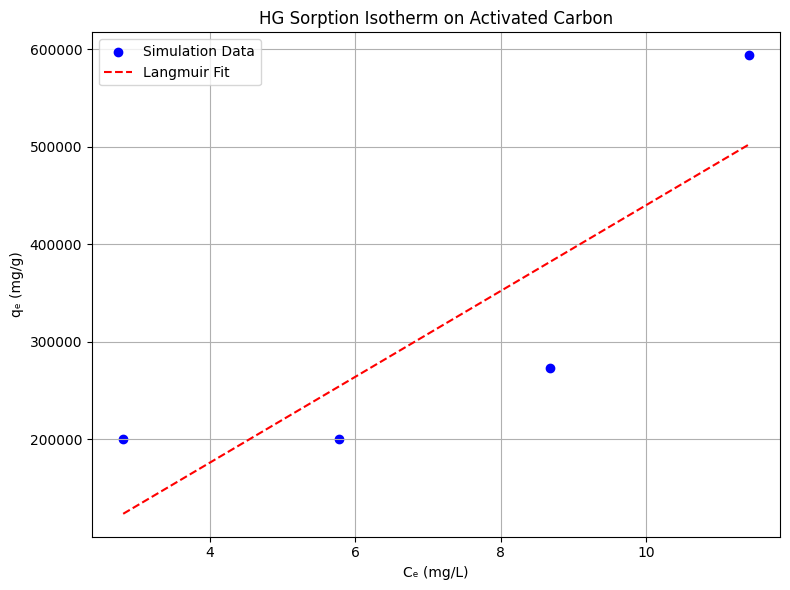

Langmuir fit parameters:
q_max = 78176052624.48 mg/g
K_L = 0.0000 L/mg


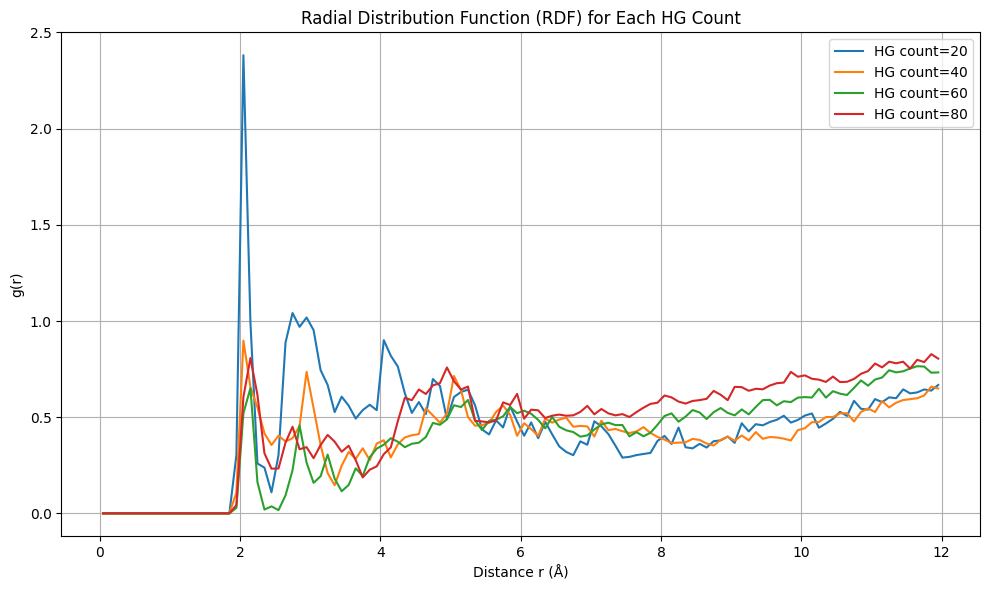

In [9]:
#Thank you to u/SocraticHope and u/qfbros on r/comp_chem for helping me debug my tleap script :)

tleap_script = """
source leaprc.protein.ff14SB

source leaprc.water.tip3p

loadAmberParams frcmod.ions234lm_126_tip3p
list
solv = createUnit solv

solvateBox solv TIP3PBOX 20.0

addIons2 solv HG 1

addIons2 solv Cl- 2

saveAmberParm solv solv.prmtop solv.inpcrd

quit
"""

with open('tleap.in', 'w') as f:
    f.write(tleap_script)

!tleap -f tleap.in

from openmm.app import AmberPrmtopFile, AmberInpcrdFile, Simulation, PDBReporter, PME, HBonds, DCDReporter
from openmm import LangevinMiddleIntegrator, Platform
from openmm.unit import kelvin, picosecond, nanometer, picoseconds
import os, numpy as np, MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
from scipy.signal import find_peaks
from scipy.spatial import cKDTree
from scipy.constants import Avogadro

def run_simulation_and_analyze(HG_count, box_dims, mass_adsorbent=1.0, initial_counts=None):
    leap_content = f"""source leaprc.protein.ff14SB
source leaprc.water.tip3p
loadAmberParams frcmod.ions234lm_126_tip3p
loadoff GGG.lib
loadoff C1A.lib
loadoff E1A.lib
loadoff H1A.lib
loadamberparams FRCMOD/GO.frcmod
mol = loadpdb functionalized.pdb
bondbydistance mol
solvateBox mol TIP3PBOX 5.0
addIons2 mol HG {HG_count}
addIons2 mol Cl- {2*HG_count}
saveamberparm mol mol_solv.prmtop mol_solv.inpcrd
quit
"""
    with open('leap.in', 'w') as f:
        f.write(leap_content)
    os.system('tleap -f leap.in')

    prmtop = AmberPrmtopFile('mol_solv.prmtop')
    inpcrd = AmberInpcrdFile('mol_solv.inpcrd')
    topology = prmtop.topology
    positions = inpcrd.positions

    system = prmtop.createSystem(nonbondedMethod=PME, nonbondedCutoff=1.0*nanometer, constraints=HBonds)
    integrator = LangevinMiddleIntegrator(300*kelvin, 1/picosecond, 0.004*picoseconds)
    platform = Platform.getPlatformByName('CPU')
    simulation = Simulation(topology, system, integrator, platform)
    simulation.context.setPositions(positions)
    simulation.minimizeEnergy()

    # Use DCDReporter to generate a trajectory file with consistent atom counts
    simulation.reporters.append(DCDReporter('trajectory.dcd', 100))
    simulation.step(5000)

    # Load the trajectory using MDAnalysis with the same topology
    u = mda.Universe('mol_solv.prmtop', 'trajectory.dcd')
    for ts in u.trajectory:
        ts.dimensions = [box_dims[0], box_dims[1], box_dims[2], 90.0, 90.0, 90.0]
    u.trajectory.rewind()

    protein = u.select_atoms('resname GGG E1A H1A C1A')
    HG = u.select_atoms('name HG')

    # RDF computation
    r_min, r_max = 0.0, 12.0
    rdf_calc = InterRDF(protein, HG, range=(r_min, r_max), nbins=120)
    rdf_calc.run()

    peaks, _ = find_peaks(rdf_calc.rdf)
    if len(peaks) > 0:
        first_peak = peaks[0]
        inverted = -rdf_calc.rdf
        minima, _ = find_peaks(inverted, distance=10)
        cands = minima[minima > first_peak]
        r_cut = rdf_calc.bins[cands[0]] if len(cands) > 0 else r_max
    else:
        r_cut = r_max

    adsorbed = 0
    total_frames = 0
    ref_group = protein
    target_group = HG
    for ts in u.trajectory:
        p_ref = ref_group.positions
        p_tg = target_group.positions
        tr_ref = cKDTree(p_ref)
        tr_tg = cKDTree(p_tg)
        sdm = tr_ref.sparse_distance_matrix(tr_tg, max_distance=r_cut, output_type='coo_matrix')
        col_ids = np.unique(sdm.col)
        adsorbed += len(col_ids)
        total_frames += 1

    avg_adsorbed = adsorbed / total_frames if total_frames > 0 else 0.0

    MW_HG = 200.59
    if initial_counts is None:
        initial_counts = {'HG': HG_count}
    N_initial = initial_counts['HG']

    volume_A3 = box_dims[0] * box_dims[1] * box_dims[2]
    volume_L = volume_A3 * 1e-24
    N_unads = N_initial - avg_adsorbed
    C_e = (N_unads * MW_HG / Avogadro) / volume_L * 1e3  # mg/L
    q_e = (avg_adsorbed * MW_HG) / mass_adsorbent * 1e3  # mg/g

    return C_e, q_e, rdf_calc.bins, rdf_calc.rdf

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv

HG_counts = [20, 40, 60, 80]
box_dims = (150.0, 150.0, 100.0)
Ce_values = []
qe_values = []
rdf_data = []

for count in HG_counts:
    Ce, qe, r, rdf = run_simulation_and_analyze(count, box_dims, mass_adsorbent=1.0, initial_counts={'HG': count})
    Ce_values.append(Ce)
    qe_values.append(qe)
    rdf_data.append((count, r, rdf))
    print(f"HG count: {count}, Ce: {Ce:.2f} mg/L, qe: {qe:.2f} mg/g")

with open('sorption_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['HG_count', 'Ce (mg/L)', 'q_e (mg/g)'])
    for count, Ce, qe in zip(HG_counts, Ce_values, qe_values):
        writer.writerow([count, Ce, qe])

def langmuir(C, q_max, K_L):
    return (q_max * K_L * C) / (1 + K_L * C)

if len(Ce_values) > 2:
    params, _ = curve_fit(langmuir, Ce_values, qe_values, p0=[max(qe_values), 0.1], maxfev=10000)
    q_max, K_L = params

    Ce_fit = np.linspace(min(Ce_values), max(Ce_values), 100)
    qe_fit = langmuir(Ce_fit, *params)

    plt.figure(figsize=(8, 6))
    plt.scatter(Ce_values, qe_values, c='b', label='Simulation Data')
    plt.plot(Ce_fit, qe_fit, 'r--', label='Langmuir Fit')
    plt.xlabel('Cₑ (mg/L)')
    plt.ylabel('qₑ (mg/g)')
    plt.title('HG Sorption Isotherm on Activated Carbon')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Langmuir fit parameters:\nq_max = {q_max:.2f} mg/g\nK_L = {K_L:.4f} L/mg")

# RDF plotting for each trial
plt.figure(figsize=(10, 6))
for count, r, rdf in rdf_data:
    plt.plot(r, rdf, label=f'HG count={count}')
plt.xlabel('Distance r (Å)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function (RDF) for Each HG Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
